In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("student-mat.csv")

# Display the first few rows
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
# Check for missing values
print("🔍 Missing values in each column:")
print(df.isnull().sum())

# Display data types of each column
print("\n🔍 Data types of columns:")
print(df.dtypes)

# Display the shape of the dataset (rows, columns)
print("\n🔍 Shape of the dataset:")
print(df.shape)


🔍 Missing values in each column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

🔍 Data types of columns:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
n

In [12]:
# Remove duplicate rows
df = df.drop_duplicates()

# Remove rows with missing values (if any)
df = df.dropna()

# Confirm the shape after cleaning
print("✅ Data cleaned.")
print("Remaining rows after cleaning:", df.shape[0])


✅ Data cleaned.
Remaining rows after cleaning: 395


In [13]:
average_g3 = df['G3'].mean()
print(f"📊 Average Final Grade (G3): {average_g3:.2f}")


📊 Average Final Grade (G3): 10.42


In [14]:
above_15_count = df[df['G3'] > 15].shape[0]
print(f"📊 Number of Students Scoring Above 15 in G3: {above_15_count}")


📊 Number of Students Scoring Above 15 in G3: 40


In [15]:
correlation = df['studytime'].corr(df['G3'])
print(f"📊 Correlation between Study Time and Final Grade (G3): {correlation:.2f}")


📊 Correlation between Study Time and Final Grade (G3): 0.10


In [16]:
avg_g3_by_gender = df.groupby('sex')['G3'].mean()
print("📊 Average Final Grade (G3) by Gender:")
print(avg_g3_by_gender)


📊 Average Final Grade (G3) by Gender:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


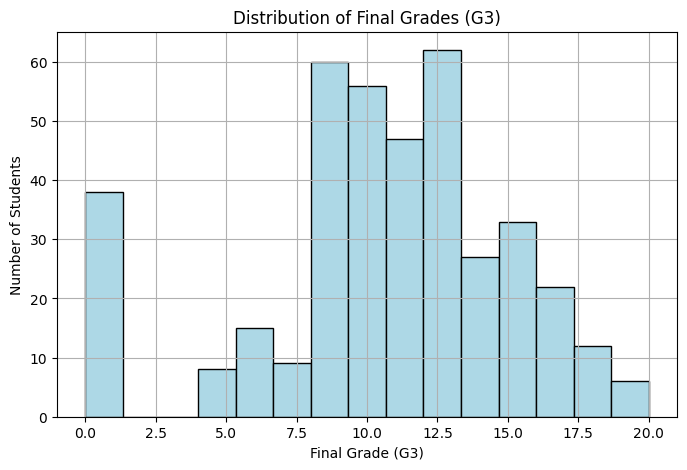

In [17]:
plt.figure(figsize=(8, 5))
plt.hist(df['G3'], bins=15, color='lightblue', edgecolor='black')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()


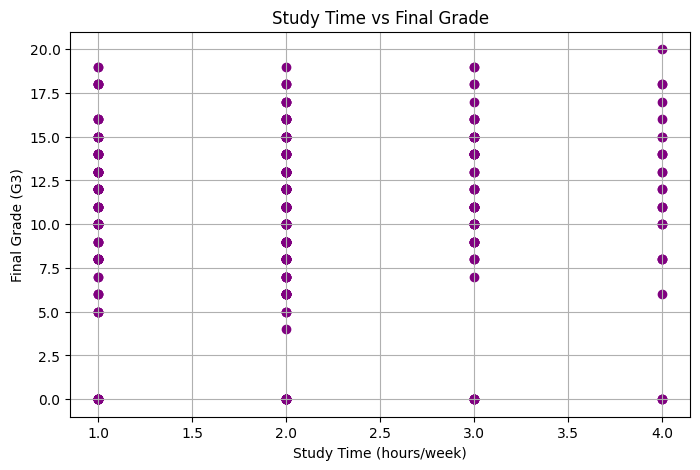

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(df['studytime'], df['G3'], color='purple')
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time (hours/week)")
plt.ylabel("Final Grade (G3)")
plt.grid(True)
plt.show()


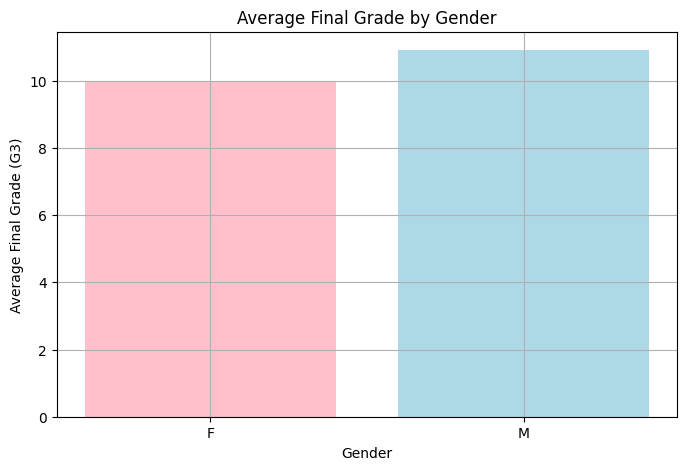

In [19]:
plt.figure(figsize=(8, 5))
genders = avg_g3_by_gender.index.tolist()
averages = avg_g3_by_gender.values.tolist()
plt.bar(genders, averages, color=['pink', 'lightblue'])
plt.title("Average Final Grade by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Final Grade (G3)")
plt.grid(True)
plt.show()
